# Hebrew Results

      model/dataset           metric gemini claude AI21  SUM of Records
0     Normal trivia        # correct    NaN    NaN  NaN            50.0
1     who told whom        # correct    NaN    NaN  NaN            30.0
2  Yes No questions        # correct    NaN    NaN  NaN            30.0
3   multi option 24        # correct     17     21    3            30.0
4               NaN  # context error      7      5    1            30.0


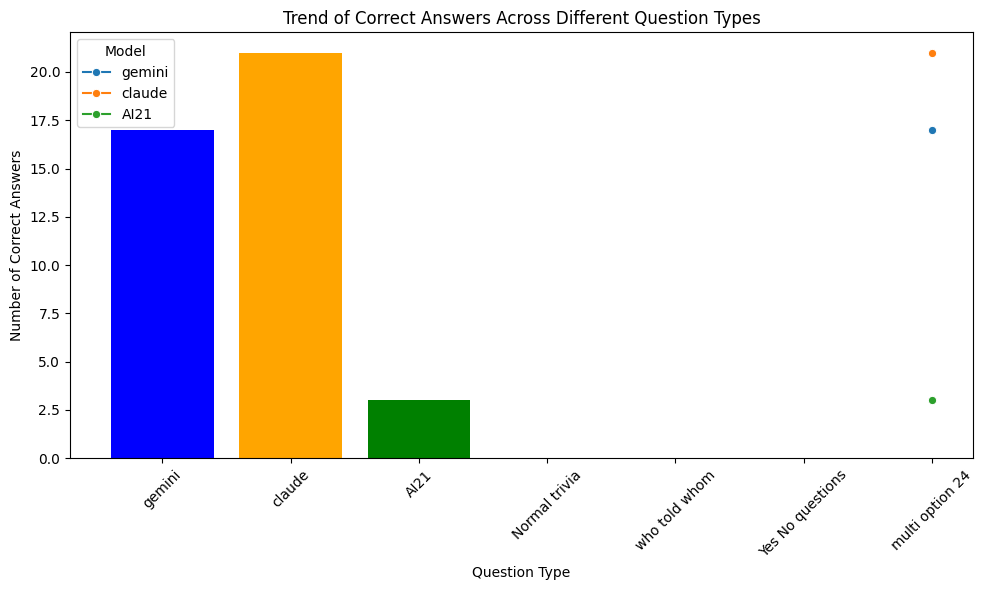

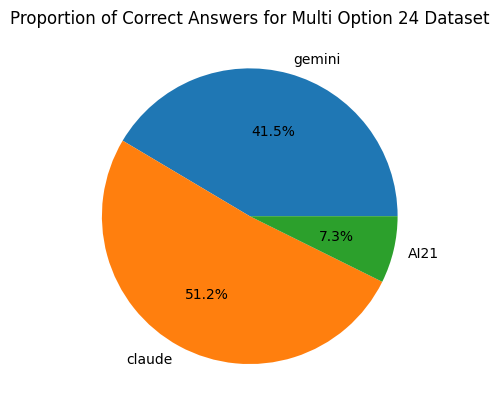

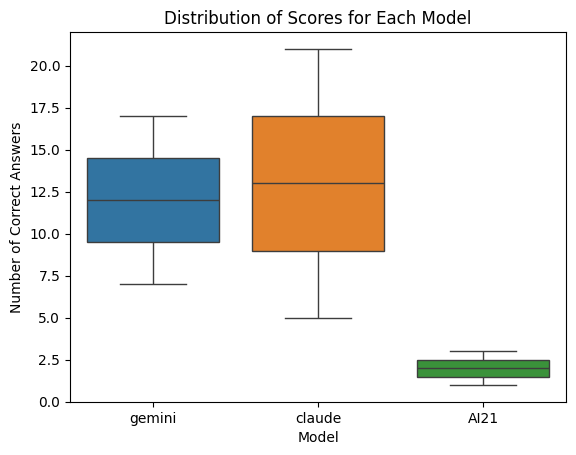

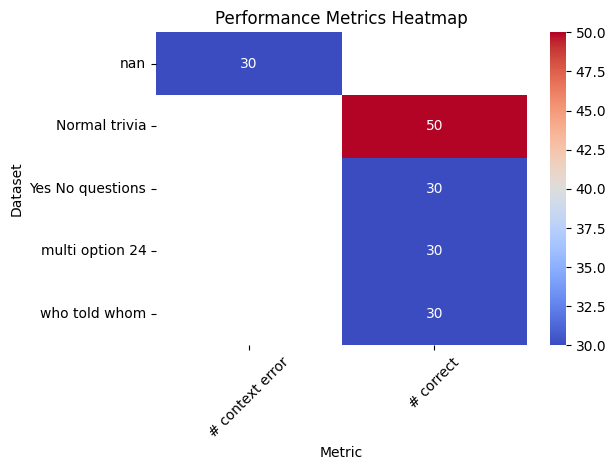

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the updated CSV file
file_path = '/content/ANLP project results - hebrew.csv'
data = pd.read_csv(file_path)

# Clean up the data
data.columns = ['model/dataset', 'metric', 'gemini', 'gemini_model', 'claude', 'claude_model', 'AI21', 'AI21_model', 'SUM of Records']
data = data.drop([0]).reset_index(drop=True)
data = data.drop(columns=['gemini_model', 'claude_model', 'AI21_model'])
print(data)

# Convert numerical values to numeric type
data['gemini'] = pd.to_numeric(data['gemini'], errors='coerce')
data['claude'] = pd.to_numeric(data['claude'], errors='coerce')
data['AI21'] = pd.to_numeric(data['AI21'], errors='coerce')
data['SUM of Records'] = pd.to_numeric(data['SUM of Records'], errors='coerce')

# Filter the data to include only 'multi option 24'
data_filtered = data[data['model/dataset'] == 'multi option 24']

# Prepare data for plotting
models = ['gemini', 'claude', 'AI21']
values = [data_filtered['gemini'].values[0], data_filtered['claude'].values[0], data_filtered['AI21'].values[0]]

# Set figure size
plt.figure(figsize=(10, 6))

# Bar Chart: Comparing performance of different models for 'multi option 24' dataset
plt.bar(models, values, color=['blue', 'orange', 'green'])
plt.title('Performance of Different Models')
plt.xlabel('Model')
plt.ylabel('Number of Correct Answers')
plt.savefig('multi_option_24_performance.pdf')


# Line Graph: Trend of correct answers across different types of questions for each model
line_data = data.melt(id_vars=['model/dataset'], value_vars=['gemini', 'claude', 'AI21'], var_name='Model', value_name='Correct Answers')
sns.lineplot(data=line_data, x='model/dataset', y='Correct Answers', hue='Model', marker='o')
plt.title('Trend of Correct Answers Across Different Question Types')
plt.xlabel('Question Type')
plt.ylabel('Number of Correct Answers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart: Proportion of correct answers across models for a specific dataset
pie_data = data[data['model/dataset'] == 'multi option 24'].drop(columns=['model/dataset', 'metric', 'SUM of Records'])
pie_data = pie_data.melt(var_name='Model', value_name='Correct Answers')
plt.pie(pie_data['Correct Answers'], labels=pie_data['Model'], autopct='%1.1f%%')
plt.title('Proportion of Correct Answers for Multi Option 24 Dataset')
plt.show()

# Box Plot: Comparing distribution of scores for each model
sns.boxplot(data=data[['gemini', 'claude', 'AI21']])
plt.title('Distribution of Scores for Each Model')
plt.xlabel('Model')
plt.ylabel('Number of Correct Answers')
plt.show()

# Heatmap: Performance metrics across different datasets and models
heatmap_data = data.pivot(index='model/dataset', columns='metric', values='SUM of Records')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Performance Metrics Heatmap')
plt.xlabel('Metric')
plt.ylabel('Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

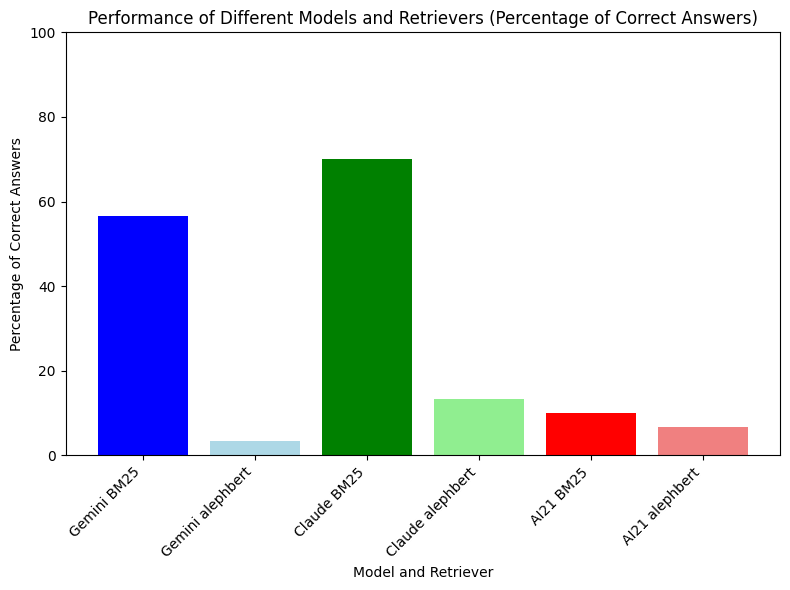

In [ ]:
file_path = '/content/ANLP project results - hebrew.csv'

data = pd.read_csv(file_path)
# Clean up the data
data.columns = ['model/dataset', 'metric', 'gemini_bm25', 'gemini_alephbert', 'claude_bm25', 'claude_alephbert', 'AI21_bm25', 'AI21_alephbert', 'SUM of Records']
data = data.drop([0]).reset_index(drop=True)

# Convert numerical values to numeric type
data['gemini_bm25'] = pd.to_numeric(data['gemini_bm25'], errors='coerce')
data['gemini_alephbert'] = pd.to_numeric(data['gemini_alephbert'], errors='coerce')
data['claude_bm25'] = pd.to_numeric(data['claude_bm25'], errors='coerce')
data['claude_alephbert'] = pd.to_numeric(data['claude_alephbert'], errors='coerce')
data['AI21_bm25'] = pd.to_numeric(data['AI21_bm25'], errors='coerce')
data['AI21_alephbert'] = pd.to_numeric(data['AI21_alephbert'], errors='coerce')
data['SUM of Records'] = pd.to_numeric(data['SUM of Records'], errors='coerce')

# Filter the data to include only 'multi option 24'
data_filtered = data[data['model/dataset'] == 'multi option 24']

# Calculate the percentage of correct answers for each retriever
total_records = data_filtered['SUM of Records'].values[0]
gemini_bm25_correct = data_filtered['gemini_bm25'].values[0]
gemini_alephbert_correct = data_filtered['gemini_alephbert'].values[0]
claude_bm25_correct = data_filtered['claude_bm25'].values[0]
claude_alephbert_correct = data_filtered['claude_alephbert'].values[0]
AI21_bm25_correct = data_filtered['AI21_bm25'].values[0]
AI21_alephbert_correct = data_filtered['AI21_alephbert'].values[0]

# Convert to percentages
gemini_bm25_percent = (gemini_bm25_correct / total_records) * 100
gemini_alephbert_percent = (gemini_alephbert_correct / total_records) * 100
claude_bm25_percent = (claude_bm25_correct / total_records) * 100
claude_alephbert_percent = (claude_alephbert_correct / total_records) * 100
AI21_bm25_percent = (AI21_bm25_correct / total_records) * 100
AI21_alephbert_percent = (AI21_alephbert_correct / total_records) * 100

# Prepare data for plotting
labels = ['Gemini BM25', 'Gemini alephbert', 'Claude BM25', 'Claude alephbert', 'AI21 BM25', 'AI21 alephbert']
values = [
    gemini_bm25_percent, gemini_alephbert_percent,
    claude_bm25_percent, claude_alephbert_percent,
    AI21_bm25_percent, AI21_alephbert_percent
]

# Set figure size
plt.figure(figsize=(8, 6))

# Bar Chart: Comparing performance of different models and retrievers for 'multi option 24' dataset
plt.bar(labels, values, color=['blue', 'lightblue', 'green', 'lightgreen', 'red', 'lightcoral'])
plt.title('Performance of Different Models and Retrievers (Percentage of Correct Answers)')
plt.xlabel('Model and Retriever')
plt.ylabel('Percentage of Correct Answers')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('models_performance_hebrew.pdf')
plt.show()

# English Results

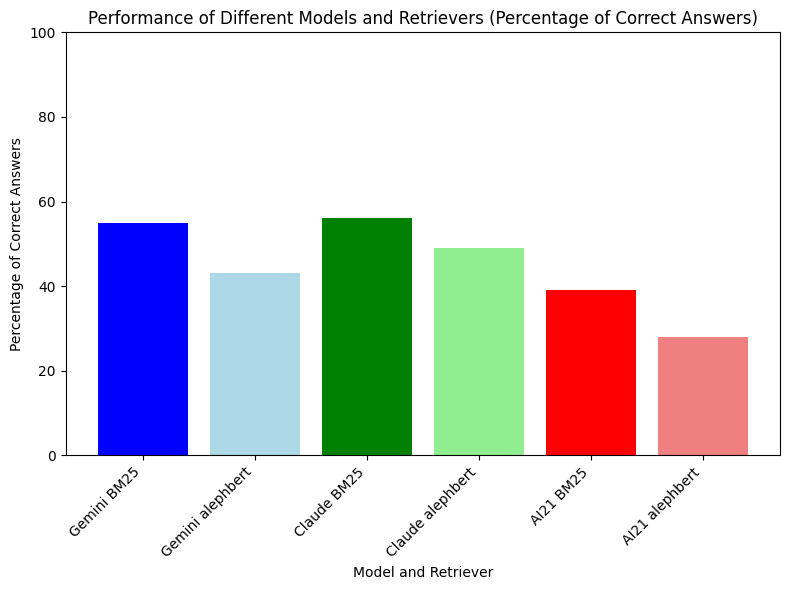

In [ ]:
file_path = '/content/ANLP project results - english.csv'
data = pd.read_csv(file_path)
# Clean up the data
data.columns = ['model/dataset', 'metric', 'gemini_bm25', 'gemini_alephbert', 'claude_bm25', 'claude_alephbert', 'AI21_bm25', 'AI21_alephbert', 'SUM of Records']
data = data.drop([0]).reset_index(drop=True)

# Convert numerical values to numeric type
data['gemini_bm25'] = pd.to_numeric(data['gemini_bm25'], errors='coerce')
data['gemini_alephbert'] = pd.to_numeric(data['gemini_alephbert'], errors='coerce')
data['claude_bm25'] = pd.to_numeric(data['claude_bm25'], errors='coerce')
data['claude_alephbert'] = pd.to_numeric(data['claude_alephbert'], errors='coerce')
data['AI21_bm25'] = pd.to_numeric(data['AI21_bm25'], errors='coerce')
data['AI21_alephbert'] = pd.to_numeric(data['AI21_alephbert'], errors='coerce')
data['SUM of Records'] = pd.to_numeric(data['SUM of Records'], errors='coerce')

# Filter the data to include only 'multi option 100'
data_filtered = data[data['model/dataset'] == 'multi option 100']

# Calculate the percentage of correct answers for each retriever
total_records = data_filtered['SUM of Records'].values[0]
gemini_bm25_correct = data_filtered['gemini_bm25'].values[0]
gemini_alephbert_correct = data_filtered['gemini_alephbert'].values[0]
claude_bm25_correct = data_filtered['claude_bm25'].values[0]
claude_alephbert_correct = data_filtered['claude_alephbert'].values[0]
AI21_bm25_correct = data_filtered['AI21_bm25'].values[0]
AI21_alephbert_correct = data_filtered['AI21_alephbert'].values[0]

# Convert to percentages
gemini_bm25_percent = (gemini_bm25_correct / total_records) * 100
gemini_alephbert_percent = (gemini_alephbert_correct / total_records) * 100
claude_bm25_percent = (claude_bm25_correct / total_records) * 100
claude_alephbert_percent = (claude_alephbert_correct / total_records) * 100
AI21_bm25_percent = (AI21_bm25_correct / total_records) * 100
AI21_alephbert_percent = (AI21_alephbert_correct / total_records) * 100

# Prepare data for plotting
labels = ['Gemini BM25', 'Gemini alephbert', 'Claude BM25', 'Claude alephbert', 'AI21 BM25', 'AI21 alephbert']
values = [
    gemini_bm25_percent, gemini_alephbert_percent,
    claude_bm25_percent, claude_alephbert_percent,
    AI21_bm25_percent, AI21_alephbert_percent
]

# Set figure size
plt.figure(figsize=(8, 6))

# Bar Chart: Comparing performance of different models and retrievers for 'multi option 24' dataset
plt.bar(labels, values, color=['blue', 'lightblue', 'green', 'lightgreen', 'red', 'lightcoral'])
plt.title('Performance of Different Models and Retrievers (Percentage of Correct Answers)')
plt.xlabel('Model and Retriever')
plt.ylabel('Percentage of Correct Answers')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('models_performance_english.pdf')
plt.show()
